# Notebook 3: Data Visualization

### Setiing up working directory:

In [1]:
AED_C_dir = 'ESC50/Dataset'

### Importing necessary Libraries:

In [2]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa.display
import librosa
import numpy as np

### Loading Metadata (CSV) File:

In [3]:
meta_data = pd.read_csv(AED_C_dir+'/metadata.csv')
print(meta_data)

     Unnamed: 0           filename  fold  target        category  esc10  \
0             3  1-100210-A-36.wav     1      36  vacuum_cleaner  False   
1             4  1-100210-B-36.wav     1      36  vacuum_cleaner  False   
2            40  1-155858-A-25.wav     1      25       footsteps  False   
3            41  1-155858-B-25.wav     1      25       footsteps  False   
4            42  1-155858-C-25.wav     1      25       footsteps  False   
..          ...                ...   ...     ...             ...    ...   
355        1992  5-263501-A-25.wav     5      25       footsteps  False   
356        1993  5-263775-A-26.wav     5      26        laughing  False   
357        1994  5-263775-B-26.wav     5      26        laughing  False   
358        1997  5-263902-A-36.wav     5      36  vacuum_cleaner  False   
359        1998   5-51149-A-25.wav     5      25       footsteps  False   

     src_file take  
0      100210    A  
1      100210    B  
2      155858    A  
3      155858  

### Defining functions for Spectrogram generaion and Spectral Centroid generation

In [4]:
def plot_spectrogram(Spectrogram):
    #plt.interactive(False)
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_subplot(111)
    ax.set_frame_on(True)
    S = Spectrogram #spectrogram
    librosa.display.specshow(librosa.power_to_db(S, ref = np.max)) #display spectrogram as a image
    plt.show()

In [5]:
def plot_spectral_centroid(S):  
  y = librosa.feature.spectral_centroid(S = S, freq = np.linspace(0, 1, num = S.shape[0]))[0]
  x = [i for i in range(S_E.shape[1])]
  plt.plot(x,y)
  plt.show()

### Visualizing Spectrograms by entering the file number when prompted to visualize that perticular file:

Enter file number (Please enter a value between 0 to 359): 100
E


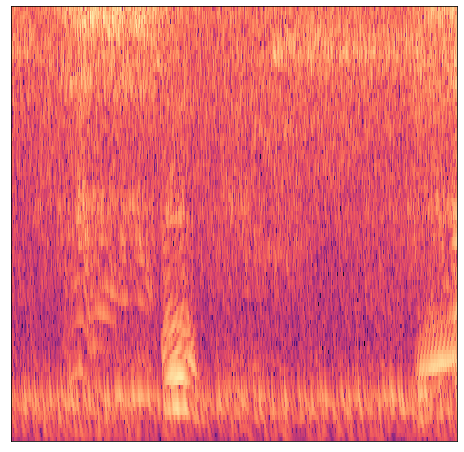

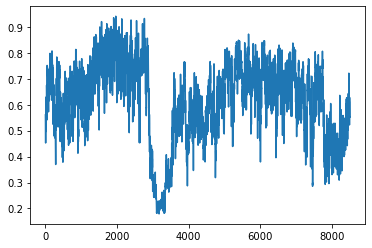

f_tract


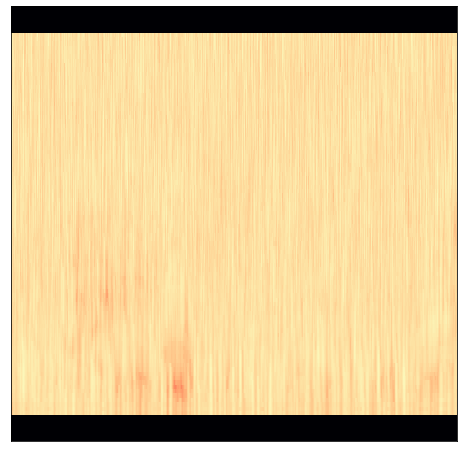

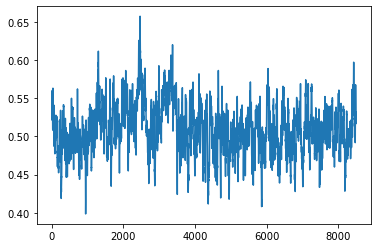

s_tract


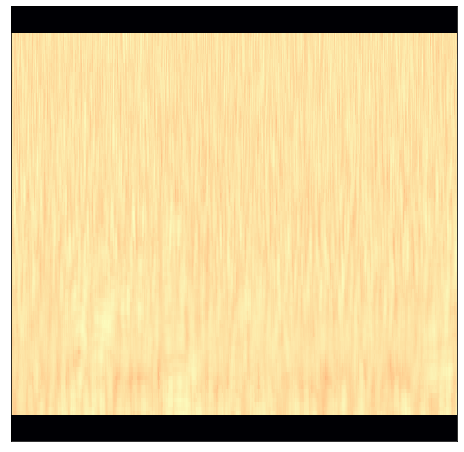

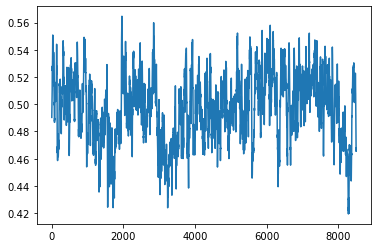

In [6]:
sl = int(input("Enter file number (Please enter a value between 0 to 359): "))
hf = h5py.File(AED_C_dir+'/tracts/'+os.listdir(AED_C_dir+'/tracts/')[sl], 'r')
S_E = np.array(hf.get('E'))
S_f_tract = np.array(hf.get('f_tract'))
S_s_tract = np.array(hf.get('s_tract'))

print('E')
#plot_spectrogram.title('E')
plot_spectrogram(S_E)
plot_spectral_centroid(S_E)

print('f_tract')
plot_spectrogram(S_f_tract)
plot_spectral_centroid(S_f_tract)

print('s_tract')
plot_spectrogram(S_s_tract)
plot_spectral_centroid(S_s_tract)